# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [159]:
# Initial imports
import os
import pandas as pd
import nltk
from dotenv import load_dotenv
%matplotlib inline

In [160]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [161]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")
len(api_key)

32

In [162]:
# Create a newsapi client
from newsapi.newsapi_client import NewsApiClient
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

In [163]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(
    q="bitcoin AND Bitcoin AND BTC",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
print(f"Total articles about bitcoin: {btc_news['totalResults']}")
btc_news["articles"][0]

Total articles about bitcoin: 1390


{'source': {'id': 'the-next-web', 'name': 'The Next Web'},
 'author': 'Satoshi Nakaboto',
 'title': 'Satoshi Nakaboto: ‘European app claims flight delay compensation for you in BTC’',
 'description': 'Our robot colleague Satoshi Nakaboto writes about Bitcoin every fucking day. Welcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you what’s been going on with Bitcoin in the past 24 hours. As Sloterdijk used to say: Money makes the wo…',
 'url': 'https://thenextweb.com/hardfork/2020/08/20/satoshi-nakaboto-european-app-claims-flight-delay-compensation-for-you-in-btc/',
 'urlToImage': 'https://img-cdn.tnwcdn.com/image/hardfork?filter_last=1&fit=1280%2C640&url=https%3A%2F%2Fcdn0.tnwcdn.com%2Fwp-content%2Fblogs.dir%2F1%2Ffiles%2F2019%2F08%2Fbitcoin_today-header_bitcoin_today.jpg&signature=30221b6a68049cc6bc3b58f3ddb38864',
 'publishedAt': '2020-08-20T08:55:11Z',
 'content': 'Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to

In [164]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(
    q="ethereum AND Ethereum AND ETH",
    language="en",
    page_size=100,
    sort_by="relevancy"
)
print(f"Total articles about bitcoin: {eth_news['totalResults']}")
eth_news["articles"][0]

Total articles about bitcoin: 579


{'source': {'id': None, 'name': 'Entrepreneur'},
 'author': 'Oliver Isaacs',
 'title': '10 Reasons Ethereum Needs to Be on Your Radar',
 'description': "Founded over five years ago, the Ethereum platform has existed mostly in the shadow of bitcoin in the public eye. Now, that's starting to change.",
 'url': 'https://www.entrepreneur.com/article/356096',
 'urlToImage': 'https://assets.entrepreneur.com/content/3x2/2000/1600111994-GettyImages-871795462.jpg',
 'publishedAt': '2020-09-18T14:00:00Z',
 'content': 'September\r\n18, 2020\r\n6 min read\r\nOpinions expressed by Entrepreneur contributors are their own.\r\nFounded over five years ago, the Ethereum platform and its native ether (ETH)\xa0have existed mostly in t… [+6239 chars]'}

In [165]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment = []

for article in btc_news["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article["content"])
      
        btc_sentiment.append({
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"],
            "text": article["content"],
            "date": article["publishedAt"]
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiment)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral", "text", "date"]
btc_df = btc_df[cols]

btc_df[:5]

,Compound,Positive,Negative,Neutral,text,date
0,0.5070,0.090,0.000,0.910,Our robot colleague Satoshi Nakaboto writes ab...,2020-08-20T08:55:11Z
1,0.5070,0.090,0.000,0.910,Our robot colleague Satoshi Nakaboto writes ab...,2020-09-10T09:00:54Z
2,-0.2677,0.045,0.074,0.881,An outspoken Bitcoin whale who rarely shows af...,2020-08-19T07:04:25Z
3,0.5070,0.090,0.000,0.910,Our robot colleague Satoshi Nakaboto writes ab...,2020-09-02T09:02:09Z
4,0.5070,0.090,0.000,0.910,Our robot colleague Satoshi Nakaboto writes ab...,2020-08-21T08:57:51Z


In [166]:
# Create the ethereum sentiment scores DataFrame
eth_sentiment = []

for article in eth_news["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article["content"])
      
        eth_sentiment.append({
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"],
            "text": article["content"],
            "date": article["publishedAt"]
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiment)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral", "text", "date"]
eth_df = eth_df[cols]

eth_df[:5]

,Compound,Positive,Negative,Neutral,text,date
0,0.0000,0.000,0.000,1.000,"September\r\n18, 2020\r\n6 min read\r\nOpinion...",2020-09-18T14:00:00Z
1,0.0000,0.000,0.000,1.000,The price of Bitcoin looks to enter a new rang...,2020-09-01T20:43:58Z
2,0.0000,0.000,0.000,1.000,POLAND - 2020/06/15: In this photo illustratio...,2020-09-01T15:53:09Z
3,0.2263,0.093,0.067,0.841,Female hand with twenty dollars on a white bac...,2020-09-07T21:08:45Z
4,-0.9081,0.046,0.347,0.607,U.S. authorities today announced criminal char...,2020-09-16T20:53:17Z


In [167]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Positive,Negative,Neutral
count,98.000000,98.000000,98.000000,98.000000
mean,0.267683,0.090612,0.028327,0.881041
std,0.374977,0.079281,0.044426,0.086522
min,-0.784500,0.000000,0.000000,0.538000
25%,0.000000,0.009250,0.000000,0.841500
50%,0.391850,0.090000,0.000000,0.910000
75%,0.507000,0.125250,0.065000,0.926500
max,0.972600,0.462000,0.177000,1.000000


In [168]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Positive,Negative,Neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.196285,0.073110,0.027740,0.899160
std,0.368279,0.071368,0.054195,0.086736
min,-0.908100,0.000000,0.000000,0.607000
25%,0.000000,0.000000,0.000000,0.844750
50%,0.177900,0.070500,0.000000,0.917000
75%,0.481000,0.112250,0.055000,0.970750
max,0.851900,0.311000,0.347000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin (BTC)

Q: Which coin had the highest compound score?

A: Bitcoin (BTC)

Q. Which coin had the highest positive score?

A: Bitcoin (BTC)

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [169]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [170]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     D:\Users\ogo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     D:\Users\ogo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [171]:
# Expand the default stopwords list if necessary
sw_addon = {'going', 'youve', 'fucking', 'chars', 'char'}

In [172]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)
    regex = re.compile("[^a-zA-Z ]")
    
    # Remove the punctuation
    re_clean = regex.sub('', text)
    # Remove the stop words
    words = word_tokenize(re_clean)
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    sw = set(stopwords.words('english'))
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    return tokens


In [173]:
# Create a new tokens column for bitcoin
btc_df['tokens']=[tokenizer(word) for word in btc_df['text']]
cols = ["Compound", "Positive", "Negative", "Neutral", "text","tokens", "date"]
btc_df = btc_df[cols]
btc_df[:5]

,Compound,Positive,Negative,Neutral,text,tokens,date
0,0.5070,0.090,0.000,0.910,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ...",2020-08-20T08:55:11Z
1,0.5070,0.090,0.000,0.910,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ...",2020-09-10T09:00:54Z
2,-0.2677,0.045,0.074,0.881,An outspoken Bitcoin whale who rarely shows af...,"[outspoken, bitcoin, whale, rarely, show, affe...",2020-08-19T07:04:25Z
3,0.5070,0.090,0.000,0.910,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ...",2020-09-02T09:02:09Z
4,0.5070,0.090,0.000,0.910,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ...",2020-08-21T08:57:51Z


In [174]:
# Create a new tokens column for ethereum
eth_df['tokens']=[tokenizer(word) for word in eth_df['text']]
cols = ["Compound", "Positive", "Negative", "Neutral", "text","tokens", "date"]
eth_df = eth_df[cols]
eth_df[:5]

,Compound,Positive,Negative,Neutral,text,tokens,date
0,0.0000,0.000,0.000,1.000,"September\r\n18, 2020\r\n6 min read\r\nOpinion...","[september, min, readopinions, expressed, entr...",2020-09-18T14:00:00Z
1,0.0000,0.000,0.000,1.000,The price of Bitcoin looks to enter a new rang...,"[price, bitcoin, look, enter, new, range, key,...",2020-09-01T20:43:58Z
2,0.0000,0.000,0.000,1.000,POLAND - 2020/06/15: In this photo illustratio...,"[poland, photo, illustration, ethereum, logo, ...",2020-09-01T15:53:09Z
3,0.2263,0.093,0.067,0.841,Female hand with twenty dollars on a white bac...,"[female, hand, twenty, dollar, white, backgrou...",2020-09-07T21:08:45Z
4,-0.9081,0.046,0.347,0.607,U.S. authorities today announced criminal char...,"[us, authority, today, announced, criminal, ch...",2020-09-16T20:53:17Z


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [175]:
from collections import Counter
from nltk import ngrams

In [176]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = ngrams(tokenizer(btc_df.text.str.cat()), n=2)
Counter(btc_bigram_counts).most_common(20)

[(('satoshi', 'nakaboto'), 36),
 (('bitcoin', 'btc'), 31),
 (('robot', 'colleague'), 18),
 (('colleague', 'satoshi'), 18),
 (('nakaboto', 'writes'), 18),
 (('writes', 'bitcoin'), 18),
 (('btc', 'every'), 18),
 (('every', 'daywelcome'), 18),
 (('daywelcome', 'another'), 18),
 (('another', 'edition'), 18),
 (('edition', 'bitcoin'), 18),
 (('bitcoin', 'today'), 18),
 (('today', 'satoshi'), 18),
 (('nakaboto', 'tell'), 18),
 (('tell', 'whats'), 18),
 (('whats', 'bitcoin'), 18),
 (('charsour', 'robot'), 17),
 (('bitcoin', 'charsour'), 16),
 (('btc', 'trading'), 15),
 (('trading', 'around'), 14)]

In [177]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = ngrams(tokenizer(eth_df.text.str.cat()), n=2)
Counter(eth_bigram_counts).most_common(20)

[(('btc', 'trading'), 10),
 (('trading', 'around'), 10),
 (('around', 'utc'), 10),
 (('utc', 'pm'), 9),
 (('pm', 'et'), 9),
 (('decentralized', 'finance'), 8),
 (('decentralized', 'exchange'), 6),
 (('et', 'slipping'), 6),
 (('ether', 'eth'), 6),
 (('ethereum', 'eth'), 5),
 (('finance', 'defi'), 5),
 (('ethereum', 'blockchain'), 5),
 (('smart', 'contract'), 5),
 (('bitcoin', 'ethereum'), 5),
 (('fee', 'ethereum'), 4),
 (('ethereum', 'network'), 4),
 (('ago', 'ethereum'), 3),
 (('exchange', 'uniswap'), 3),
 (('went', 'live'), 3),
 (('et', 'gaining'), 3)]

In [178]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [179]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
btc_all_tokens = tokenizer(btc_df.text.str.cat())
token_count(btc_all_tokens, 10)

[('bitcoin', 101),
 ('btc', 56),
 ('satoshi', 36),
 ('nakaboto', 36),
 ('charsbitcoin', 24),
 ('today', 22),
 ('price', 21),
 ('trading', 21),
 ('every', 19),
 ('another', 19)]

In [180]:
# Get the top 10 words for Ethereum
eth_all_tokens = tokenizer(eth_df.text.str.cat())
token_count(eth_all_tokens, 10)

[('ethereum', 52),
 ('ha', 31),
 ('eth', 29),
 ('ether', 16),
 ('decentralized', 16),
 ('network', 15),
 ('bitcoin', 14),
 ('exchange', 14),
 ('fee', 14),
 ('btc', 14)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [181]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

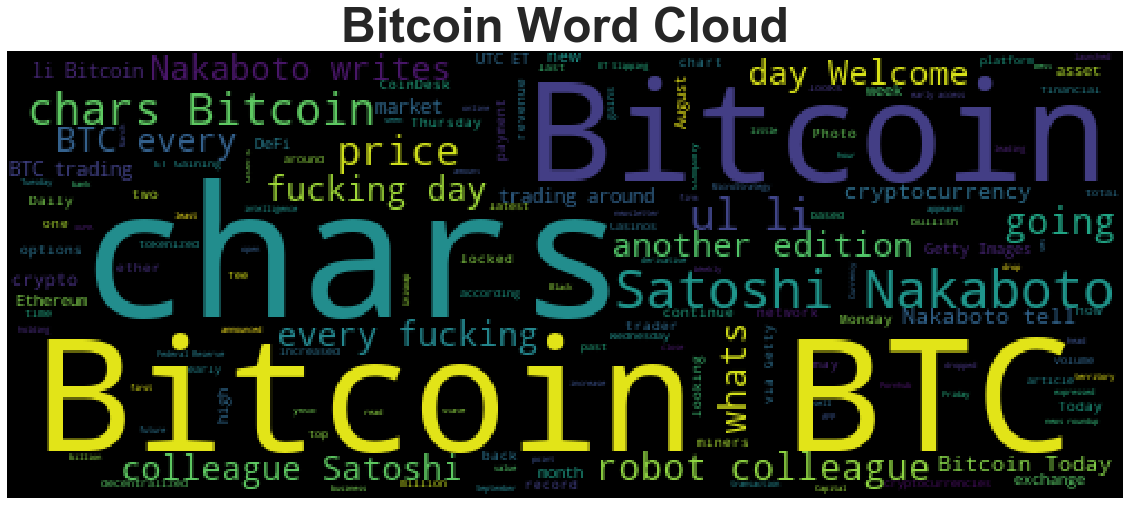

In [182]:
# Generate the Bitcoin word cloud
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500).generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()
    
wordcloud(btc_df.text.str.cat(), title="Bitcoin Word Cloud")

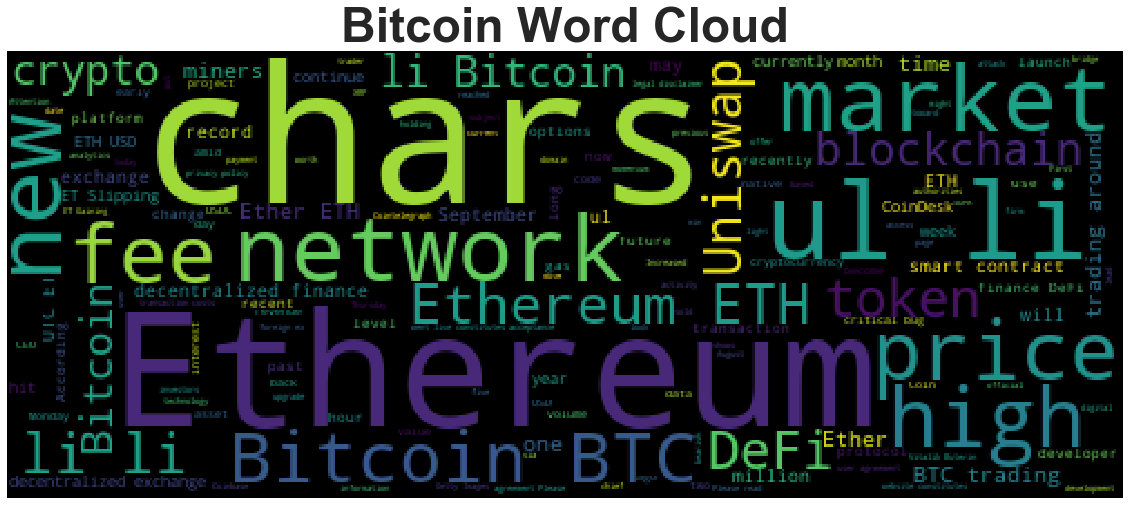

In [183]:
# Generate the Ethereum word cloud
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500).generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()
    
wordcloud(eth_df.text.str.cat(), title="Bitcoin Word Cloud")

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [184]:
import spacy
from spacy import displacy

In [185]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [186]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [187]:
# Concatenate all of the bitcoin text together
all_btc_text = btc_df.text.str.cat()
all_btc_text

"Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in … [+2968 chars]Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in … [+2989 chars]An outspoken Bitcoin whale who rarely shows affection for anything other than BTC says two crypto assets have potential.\r\nThe pseudonymous trader known as Joe007 says UNUS SED LEO (LEO) may be a soli… [+1503 chars]Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in … [+2623 chars]Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin Today, where 

In [188]:

# Run the NER processor on all of the text
btc_doc = nlp(all_btc_text)

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [189]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [190]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text, ent.label_)

Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
BTC ORG
two CARDINAL
UNUS SED LEO ORG
LEO ORG
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
B

---

## Ethereum NER

In [191]:
# Concatenate all of the bitcoin text together
all_eth_text = eth_df.text.str.cat()
all_eth_text

"September\r\n18, 2020\r\n6 min read\r\nOpinions expressed by Entrepreneur contributors are their own.\r\nFounded over five years ago, the Ethereum platform and its native ether (ETH)\xa0have existed mostly in t… [+6239 chars]The price of Bitcoin looks to enter a new range after a key breakout.\r\nSOPA Images/LightRocket via Getty Images\r\nThe price of Bitcoin rose to as high as $12,086 on Coinbase, as Ethereum (ETH) buoyed … [+3138 chars]POLAND - 2020/06/15: In this photo illustration an Ethereum logo seen displayed on a smartphone. ... [+] (Photo Illustration by Mateusz Slodkowski/SOPA Images/LightRocket via Getty Images)\r\nSOPA Imag… [+2371 chars]Female hand with twenty dollars on a white background.\r\ngetty\r\nSince May, Ethereum has outperformed bitcoin, largely due to the decentralized finance (DeFi) frenzy, which saw numerous DeFi tokens wit… [+2922 chars]U.S. authorities today announced criminal charges and financial sanctions against two Russian men accused of stealing near

In [192]:
# Run the NER processor on all of the text
eth_doc = nlp(all_eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [193]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [194]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

September DATE
18 DATE
2020 DATE
6 min QUANTITY
five years ago DATE
Ethereum ORG
ETH ORG
Bitcoin GPE
Bitcoin GPE
as high as $12,086 MONEY
Ethereum (ETH ORG
Ethereum ORG
Mateusz Slodkowski/ PERSON
twenty dollars MONEY
May DATE
bitcoin GPE
DeFi LOC
DeFi LOC
today DATE
two CARDINAL
Russian NORP
nearly $17 million MONEY
16, 2020 DATE
6 min QUANTITY
the past few months DATE
working dynamics ORG
Uniswap ORG
400 CARDINAL
UNI ORG
September 1 DATE
the 0x exchange ORG
Mondays DATE
$7 million MONEY
the past month DATE
ul><li GPE
Bitcoin GPE
BTC ORG
around $12,00 MONEY
the Ethereum 2.0 ORG
zero CARDINAL
Monday DATE
September DATE
ul><li PERSON
Bitcoin GPE
BTC ORG
around $10,669 MONEY
20:00 TIME
4 p.m. ET TIME
3.4% PERCENT
the previous 24 DATE
Diogenes GPE
a Verifiable Delay Function ORG
VDF ORG
Ethereum ORG
the Centre Consortium ORG
Thursday DATE
ul><li PERSON
Dubbed GPE
USD Coin ORG
DeFi ORG
Bankless YouTube ORG
Tuesday DATE
Mariano Conti PERSON
Wednesday DATE
DeFi ORG
ul><li PERSON
Bitcoin GPE
B